<a href="https://colab.research.google.com/github/imnbid/MachinLearning2025/blob/main/miniproject2/LinearSVM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!gdown 1oA2bbA2xL3oi_BGVDSYbhwFxHghFWWzc

Downloading...
From: https://drive.google.com/uc?id=1oA2bbA2xL3oi_BGVDSYbhwFxHghFWWzc
To: /content/data.csv
100% 125k/125k [00:00<00:00, 32.1MB/s]


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


New X shape: (569, 30)
X shape: (569, 30)
y shape: (569,)
تعداد نمونه‌های بدخیم (1): 212
تعداد نمونه‌های خوش‌خیم (0): 357
تعداد نمونه‌های train: 341
تعداد نمونه‌های val  : 114
تعداد نمونه‌های test : 114
شکل داده‌ی پس از PCA (train): (341, 2)


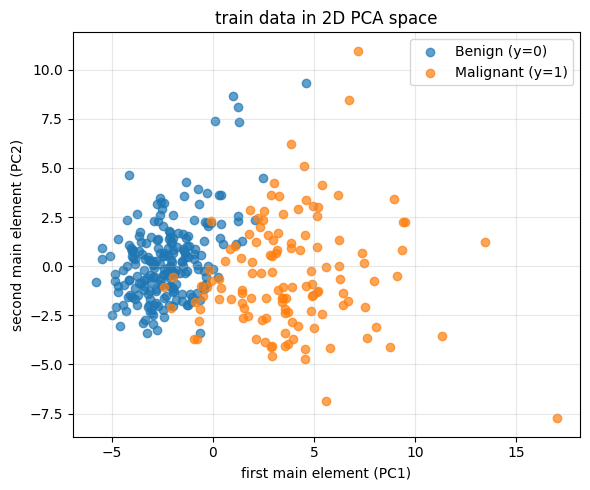

In [7]:
# 7-a) آماده‌سازی داده و پیش‌پردازش

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------------------------------------------
# 1) خواندن داده از فایل CSV
# ----------------------------------------------------
data = pd.read_csv("data.csv")

# حذف ستون id (فقط شناسه است)
data = data.drop(columns=["id"])

# برچسب‌ها: diagnosis -> 1 برای M، 0 برای B
data["target"] = (data["diagnosis"] == "M").astype(int)
y = data["target"].values

# ویژگی‌ها: تمام ستون‌های عددی به جز diagnosis و target
X = data.drop(columns=["diagnosis", "target"]).values

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.0)
X = vt.fit_transform(X)

print("New X shape:", X.shape)

print("X shape:", X.shape)  # مثلاً (569, 30)
print("y shape:", y.shape)
print("تعداد نمونه‌های بدخیم (1):", y.sum())
print("تعداد نمونه‌های خوش‌خیم (0):", (y == 0).sum())

# ----------------------------------------------------
# 2) تقسیم لایه‌به‌لایه train / val / test
# ----------------------------------------------------
# دو رقم آخر شماره‌دانشجویی
random_state = 3

# مرحله‌ی اول: train (60%) و temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=random_state
)

# مرحله‌ی دوم: تقسیم temp به validation (20%) و test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,   # نصف 40% می‌شود 20%
    stratify=y_temp,
    random_state=random_state
)

print("تعداد نمونه‌های train:", X_train.shape[0])
print("تعداد نمونه‌های val  :", X_val.shape[0])
print("تعداد نمونه‌های test :", X_test.shape[0])

# ----------------------------------------------------
# 3) استانداردسازی ویژگی‌ها
# ----------------------------------------------------
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std   = scaler.transform(X_val)
X_test_std  = scaler.transform(X_test)

# ----------------------------------------------------
# 4) PCA دوبعدی صرفاً برای نمایش (Visualization)
#    (مدل SVM روی X_train_std کامل آموزش داده می‌شود)
# ----------------------------------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca   = pca.transform(X_val_std)
X_test_pca  = pca.transform(X_test_std)

print("شکل داده‌ی پس از PCA (train):", X_train_pca.shape)

# ----------------------------------------------------
# 5) ترسیم داده‌ی train در فضای دو مؤلفه‌ی اصلی اول
# ----------------------------------------------------
plt.figure(figsize=(6, 5))

# کلاس 0: خوش‌خیم (B)
plt.scatter(
    X_train_pca[y_train == 0, 0],
    X_train_pca[y_train == 0, 1],
    color="tab:blue",
    alpha=0.7,
    label="Benign (y=0)"
)

# کلاس 1: بدخیم (M)
plt.scatter(
    X_train_pca[y_train == 1, 0],
    X_train_pca[y_train == 1, 1],
    color="tab:orange",
    alpha=0.7,
    label="Malignant (y=1)"
)

plt.xlabel("first main element (PC1)")
plt.ylabel("second main element (PC2)")
plt.title("train data in 2D PCA space")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

نورم بردار وزن ||w|| = 2.5498706854358266
معکوس نورم 1/||w||  = 0.3921767506531724

نتایج روی مجموعه‌ی validation:
  Accuracy  = 0.9474
  Precision = 0.9512
  Recall    = 0.9070
  F1-score  = 0.9286
  ROC-AUC   = 0.9954

نتایج روی مجموعه‌ی test:
  Accuracy  = 0.9825
  Precision = 0.9762
  Recall    = 0.9762
  F1-score  = 0.9762
  ROC-AUC   = 0.9977


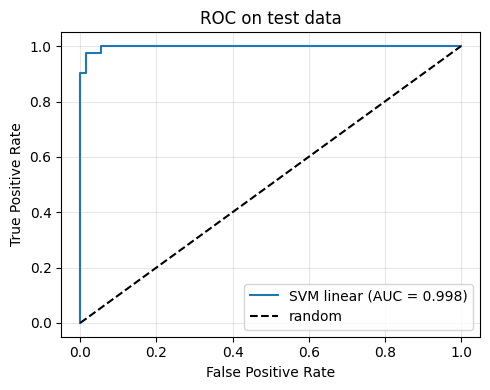

In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# ---------------------------
# 1) استانداردسازی ورودی‌ها
# ---------------------------
# فرض: scaler روی X_train فیت شده است.
X_train_std = scaler.transform(X_train)
X_val_std   = scaler.transform(X_val)
X_test_std  = scaler.transform(X_test)

# ---------------------------
# 2) آموزش SVM خطی
# ---------------------------
# مقدار C در بخش‌های بعدی (ج) به صورت شبکه‌ای بررسی می‌شود.
# در این‌جا برای بخش ب می‌توانیم موقتاً C=1 را در نظر بگیریم.
C_value = 1.0

svm_clf = SVC(
    kernel='linear',
    C=C_value,
    random_state=random_state,   # دو رقم آخر شماره دانشجویی
    probability=False           # برای ROC به decision_function نیاز داریم
)

svm_clf.fit(X_train_std, y_train)

# ---------------------------
# 3) استخراج بردار وزن w و نورم آن
# ---------------------------
w = svm_clf.coef_[0]      # شکل: (d,)
b = svm_clf.intercept_[0] # بایاس

w_norm = np.linalg.norm(w, ord=2)
margin_inv = 1.0 / w_norm

print("نورم بردار وزن ||w|| =", w_norm)
print("معکوس نورم 1/||w||  =", margin_inv)

# ---------------------------
# 4) پیش‌بینی و شاخص‌ها روی validation و test
# ---------------------------
def evaluate_svm(model, X, y_true, set_name="set"):
    # برچسب‌های پیش‌بینی‌شده
    y_pred = model.predict(X)

    # نمره‌ی تصمیم برای ROC-AUC
    scores = model.decision_function(X)

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=1)
    rec  = recall_score(y_true, y_pred, pos_label=1)
    f1   = f1_score(y_true, y_pred, pos_label=1)
    auc  = roc_auc_score(y_true, scores)

    print(f"\nنتایج روی مجموعه‌ی {set_name}:")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Precision = {prec:.4f}")
    print(f"  Recall    = {rec:.4f}")
    print(f"  F1-score  = {f1:.4f}")
    print(f"  ROC-AUC   = {auc:.4f}")

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc
    }

metrics_val  = evaluate_svm(svm_clf, X_val_std,  y_val,  set_name="validation")
metrics_test = evaluate_svm(svm_clf, X_test_std, y_test, set_name="test")

# اگر بخواهی منحنی ROC را هم در همین بخش رسم کنی:
import matplotlib.pyplot as plt

scores_test = svm_clf.decision_function(X_test_std)
fpr, tpr, thresholds = roc_curve(y_test, scores_test)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"SVM linear (AUC = {metrics_test['roc_auc']:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on test data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


نتایج روی مجموعه‌ی Train (C=0.01):
  Accuracy  = 0.9648
  Precision = 0.9915
  Recall    = 0.9134
  F1-score  = 0.9508
  ROC-AUC   = 0.9936

نتایج روی مجموعه‌ی Val (C=0.01):
  Accuracy  = 0.9737
  Precision = 1.0000
  Recall    = 0.9302
  F1-score  = 0.9639
  ROC-AUC   = 0.9990

نتایج روی مجموعه‌ی Train (C=0.1):
  Accuracy  = 0.9824
  Precision = 0.9840
  Recall    = 0.9685
  F1-score  = 0.9762
  ROC-AUC   = 0.9957

نتایج روی مجموعه‌ی Val (C=0.1):
  Accuracy  = 0.9649
  Precision = 0.9756
  Recall    = 0.9302
  F1-score  = 0.9524
  ROC-AUC   = 0.9961

نتایج روی مجموعه‌ی Train (C=1):
  Accuracy  = 0.9883
  Precision = 0.9920
  Recall    = 0.9764
  F1-score  = 0.9841
  ROC-AUC   = 0.9964

نتایج روی مجموعه‌ی Val (C=1):
  Accuracy  = 0.9474
  Precision = 0.9512
  Recall    = 0.9070
  F1-score  = 0.9286
  ROC-AUC   = 0.9954

نتایج روی مجموعه‌ی Train (C=10):
  Accuracy  = 0.9912
  Precision = 0.9921
  Recall    = 0.9843
  F1-score  = 0.9881
  ROC-AUC   = 0.9976

نتایج روی مجموعه‌ی Val (C=10

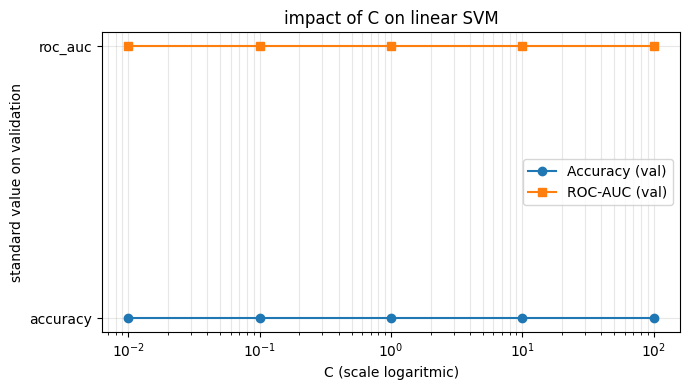

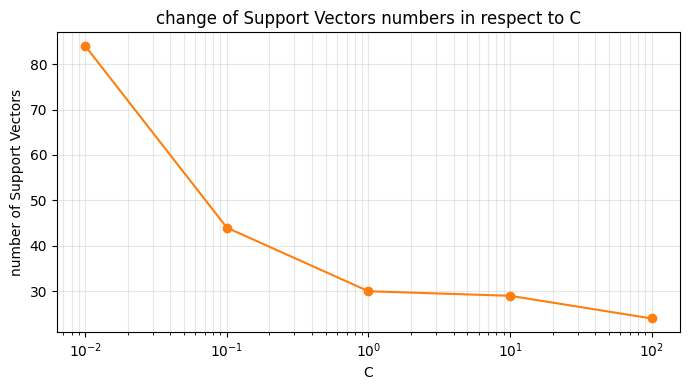

In [9]:
# 7-c) مطالعه‌ی پارامتر C برای SVM خطی

import pandas as pd
from sklearn.svm import SVC

C_values = [0.01, 0.1, 1, 10, 100]

results = []

for C in C_values:
    clf = SVC(
        kernel="linear",
        C=C,
        probability=False,
        random_state=random_state
    )
    clf.fit(X_train_std, y_train)

    # ارزیابی روی train و validation
    acc_tr, prec_tr, rec_tr, f1_tr, auc_tr = evaluate_svm(clf, X_train_std, y_train, set_name=f"Train (C={C})")
    acc_va, prec_va, rec_va, f1_va, auc_va = evaluate_svm(clf, X_val_std,   y_val,   set_name=f"Val (C={C})")

    n_sv = clf.n_support_.sum()
    w_norm = np.linalg.norm(clf.coef_.ravel())

    results.append({
        "C": C,
        "n_support": n_sv,
        "w_norm": w_norm,
        "acc_train": acc_tr,
        "acc_val": acc_va,
        "f1_train": f1_tr,
        "f1_val": f1_va,
        "auc_train": auc_tr,
        "auc_val": auc_va,
        "prec_val": prec_va,
        "rec_val": rec_va,
    })

# تبدیل به جدول
df_res = pd.DataFrame(results)
print("\nجدول نتایج برای مقادیر مختلف C (SVM خطی):")
print(df_res)

# می‌توان برای انتخاب C بهینه، مثلاً بیشترین auc_val یا acc_val را در نظر گرفت:
best_idx = df_res["acc_val"].idxmax()
best_C = df_res.loc[best_idx, "C"]
print("\nC optimal based on Accuracy on validation:", best_C)

# اگر دوست داری نمودار هم رسم کنی (اختیاری):
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.semilogx(df_res["C"], df_res["acc_val"], marker="o", label="Accuracy (val)")
plt.semilogx(df_res["C"], df_res["auc_val"], marker="s", label="ROC-AUC (val)")
plt.xlabel("C (scale logaritmic)")
plt.ylabel("standard value on validation")
plt.title("impact of C on linear SVM")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.semilogx(df_res["C"], df_res["n_support"], marker="o", color="tab:orange")
plt.xlabel("C")
plt.ylabel("number of Support Vectors")
plt.title("change of Support Vectors numbers in respect to C")
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

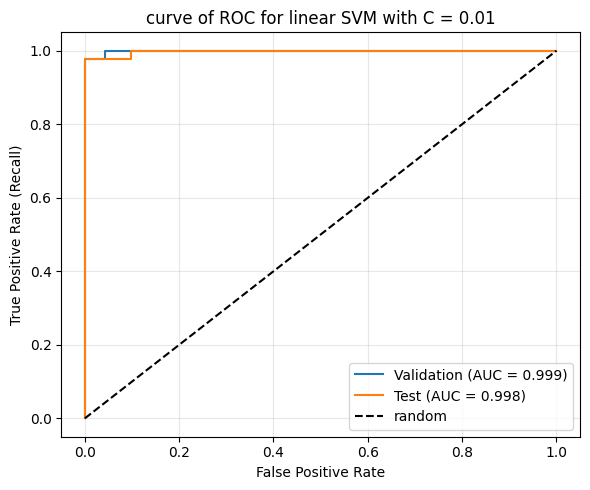

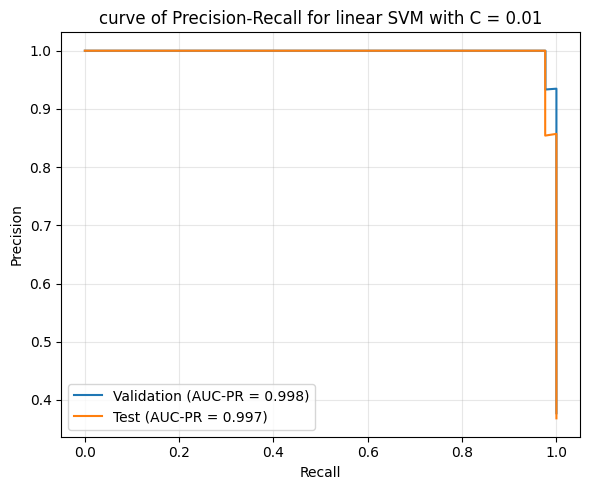

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# استفاده از بهترین C به‌دست‌آمده از بخش ج
best_C = float(best_C)   # اگر از سلول قبلی می‌آید

# مدل نهایی SVM خطی با C*
final_svm = SVC(
    kernel='linear',
    C=best_C,
    random_state=random_state
)
final_svm.fit(X_train_std, y_train)

# خروجی پیوسته روی validation و test
scores_val  = final_svm.decision_function(X_val_std)
scores_test = final_svm.decision_function(X_test_std)

y_pred_test = final_svm.predict(X_test_std)

# --- منحنی ROC روی validation و test ---
fpr_val,  tpr_val,  _ = roc_curve(y_val,  scores_val)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)

auc_val  = auc(fpr_val,  tpr_val)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6, 5))
plt.plot(fpr_val,  tpr_val,  label=f"Validation (AUC = {auc_val:.3f})")
plt.plot(fpr_test, tpr_test, label=f"Test (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"curve of ROC for linear SVM with C = {best_C}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- منحنی Precision-Recall روی validation و test ---
prec_val,  rec_val,  _ = precision_recall_curve(y_val,  scores_val)
prec_test, rec_test, _ = precision_recall_curve(y_test, scores_test)

auc_pr_val  = auc(rec_val,  prec_val)
auc_pr_test = auc(rec_test, prec_test)

plt.figure(figsize=(6, 5))
plt.plot(rec_val,  prec_val,  label=f"Validation (AUC-PR = {auc_pr_val:.3f})")
plt.plot(rec_test, prec_test, label=f"Test (AUC-PR = {auc_pr_test:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"curve of Precision-Recall for linear SVM with C = {best_C}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()